<a href="https://colab.research.google.com/github/RSNROXX/Analysis-of-Indian-and-US-Stocks-Using-ML-Models/blob/main/LinearRegression_NASDAQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [ ]:
data = pd.read_csv("/content/NasdaqIXIC.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,4726.810059,1435150000
1,2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,4652.569824,1794470000
2,2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,4592.740234,2167320000
3,2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,4650.470215,1957950000
4,2015-01-08,4689.540039,4741.379883,4688.020020,4736.189941,4736.189941,2105450000


In [ ]:
df

,index,Date,Close,Prediction
0,0,2015-01-02,4726.810059,4211.828047
1,1,2015-01-05,4652.569824,4215.162507
2,2,2015-01-06,4592.740234,4218.496967
3,3,2015-01-07,4650.470215,4221.831427
4,4,2015-01-08,4736.189941,4225.165887
...,...,...,...,...
1253,1253,2019-12-24,8952.879883,8389.906266
1254,1254,2019-12-26,9022.389648,8393.240725
1255,1255,2019-12-27,9006.620117,8396.575185
1256,1256,2019-12-30,8945.990234,8399.909645


In [ ]:
df = pd.DataFrame(data, columns=['Date','Close'])

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,Date,Close
0,0,2015-01-02,4726.810059
1,1,2015-01-05,4652.569824
2,2,2015-01-06,4592.740234
3,3,2015-01-07,4650.470215
4,4,2015-01-08,4736.189941


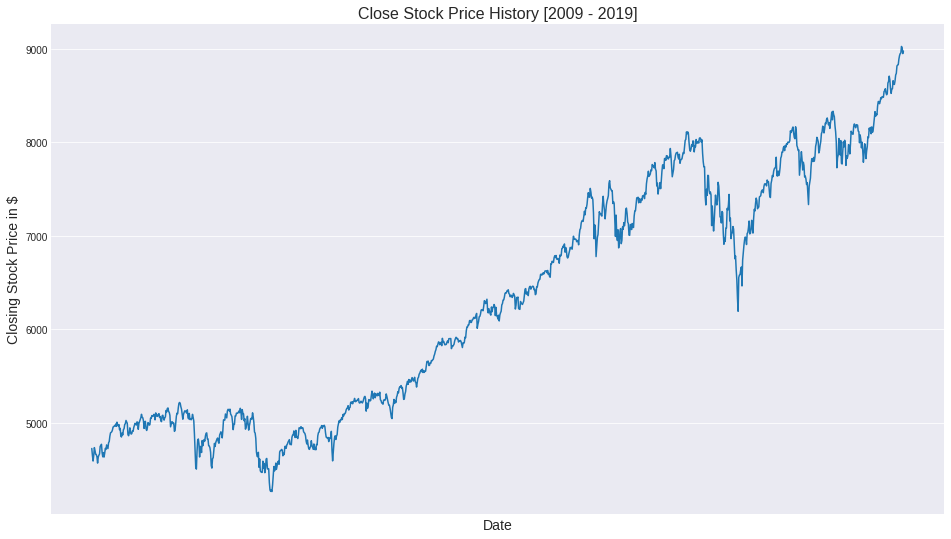

In [ ]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [ ]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  3.334459871034392
Intercept:  4211.828047166578


<ipython-input-26-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


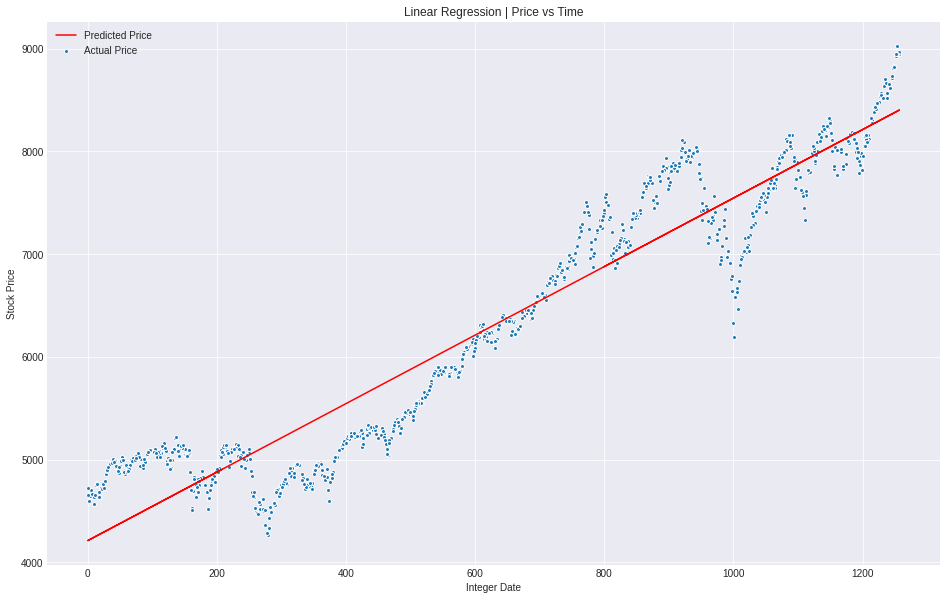

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [ ]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [ ]:
# Get number of rows in data set for random sample
df.shape

(1258, 3)

In [ ]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [ ]:
df_sample.head()

,index,Date,Close
11,11,2015-01-20,4654.850098
129,129,2015-07-09,4922.399902
257,257,2016-01-11,4637.990234
318,318,2016-04-08,4850.689941
437,437,2016-09-27,5305.709961


In [ ]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [ ]:
df.head()

,index,Date,Close,Prediction
0,0,2015-01-02,4726.810059,4211.828047
1,1,2015-01-05,4652.569824,4215.162507
2,2,2015-01-06,4592.740234,4218.496967
3,3,2015-01-07,4650.470215,4221.831427
4,4,2015-01-08,4736.189941,4225.165887


In [ ]:
df


,index,Date,Close,Prediction
0,0,2015-01-02,4726.810059,4211.828047
1,1,2015-01-05,4652.569824,4215.162507
2,2,2015-01-06,4592.740234,4218.496967
3,3,2015-01-07,4650.470215,4221.831427
4,4,2015-01-08,4736.189941,4225.165887
...,...,...,...,...
1253,1253,2019-12-24,8952.879883,8389.906266
1254,1254,2019-12-26,9022.389648,8393.240725
1255,1255,2019-12-27,9006.620117,8396.575185
1256,1256,2019-12-30,8945.990234,8399.909645
